# Importing Dependencies and The Data

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_rows', 0)

path = os.getcwd()
data_path = 'C:\\Users\\Hrishi\\Projects\\Data\\'

In [131]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_sub = pd.read_csv(data_path + 'sample_submission.csv')

In [132]:
target = 'season'

---
# EDA

In [133]:
train.shape, test.shape, sample_sub.shape

((42748, 14), (18321, 14), (18321, 1))

In [134]:
train.head(3)

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a


In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


### Missing Values

In [136]:
pd.concat([train.isna().sum(), test.isna().sum()], axis = 1, keys = ['Train', 'Test'])

,Train,Test
edible-poisonous,0,0
cap-diameter,0,0
cap-shape,0,0
cap-color,0,0
does-bruise-or-bleed,0,0
gill-attachment,6940,2944
gill-color,0,0
stem-height,0,0
stem-width,0,0
stem-color,0,0


### N-Uniques

In [137]:
pd.concat([train.nunique(), test.nunique()], axis = 1, keys = ['Train', 'Test'])

,Train,Test
edible-poisonous,2,2
cap-diameter,2373,2036
cap-shape,7,7
cap-color,12,12
does-bruise-or-bleed,2,2
gill-attachment,7,7
gill-color,12,12
stem-height,2083,1715
stem-width,4252,3497
stem-color,13,13


### Stats

In [138]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,42748.0,6.712018,5.203768,0.38,3.48,5.84,8.54,62.34
stem-height,42748.0,6.580449,3.368385,0.00,4.64,5.95,7.74,33.92
stem-width,42748.0,12.133964,10.058929,0.00,5.19,10.14,16.53,103.91


In [139]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,18321.0,6.784805,5.404473,0.44,3.49,5.91,8.56,58.11
stem-height,18321.0,6.584079,3.373912,0.00,4.63,5.96,7.76,32.03
stem-width,18321.0,12.185449,9.982326,0.00,5.25,10.30,16.66,98.00
season,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## Target Distribution

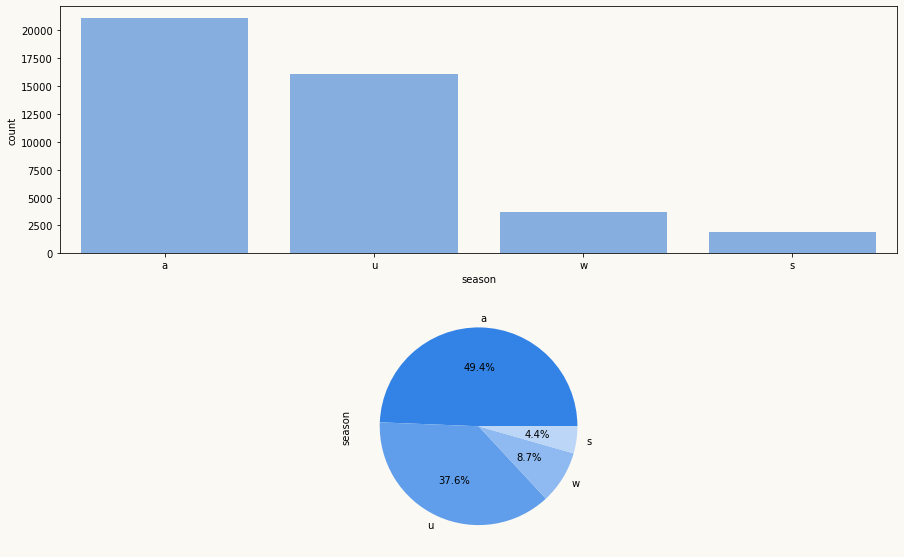

In [140]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 1)

background_color = "#faf9f4"
color_palette = ["#8d9e8c", "#eeb977"]

# Fig 1
ax0 = fig.add_subplot(gs[0, 0])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)


target = 'season'
sns.countplot(data = train, x = target, order = 'auws', ax = ax0,color="#77acee",zorder=3)

# Fig 2
ax1 = fig.add_subplot(gs[1, 0])
fig.patch.set_facecolor(background_color)
ax1.set_facecolor(background_color)

train[target].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax1, colors = ['#3383e6', '#609eeb', '#8ebaf1', '#bbd6f7'])

---
# Univariate Analysis

In [141]:
cat_cols = [col for col in list(train.select_dtypes('object').columns) if col not in [target]]
num_cols = [col for col in list(train.select_dtypes('float').columns)]

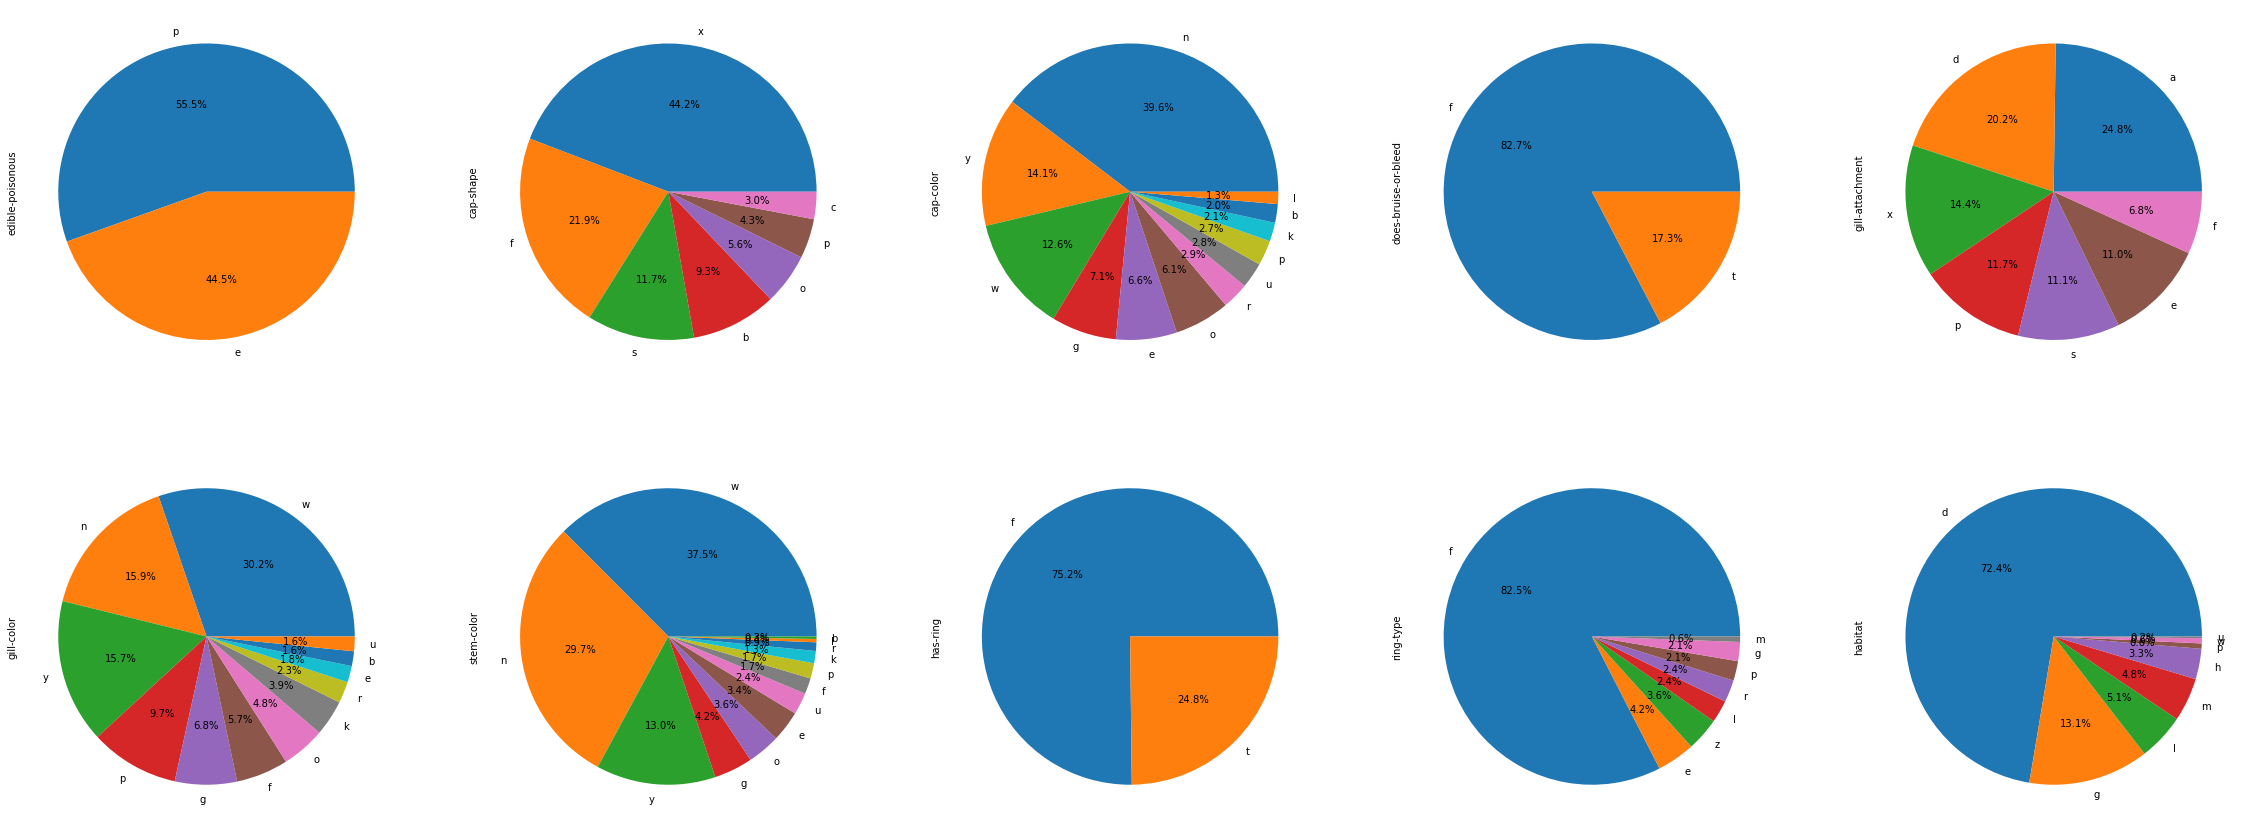

In [142]:
f, ax = plt.subplots(2, 5, figsize = (40 , 15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    train[ col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])

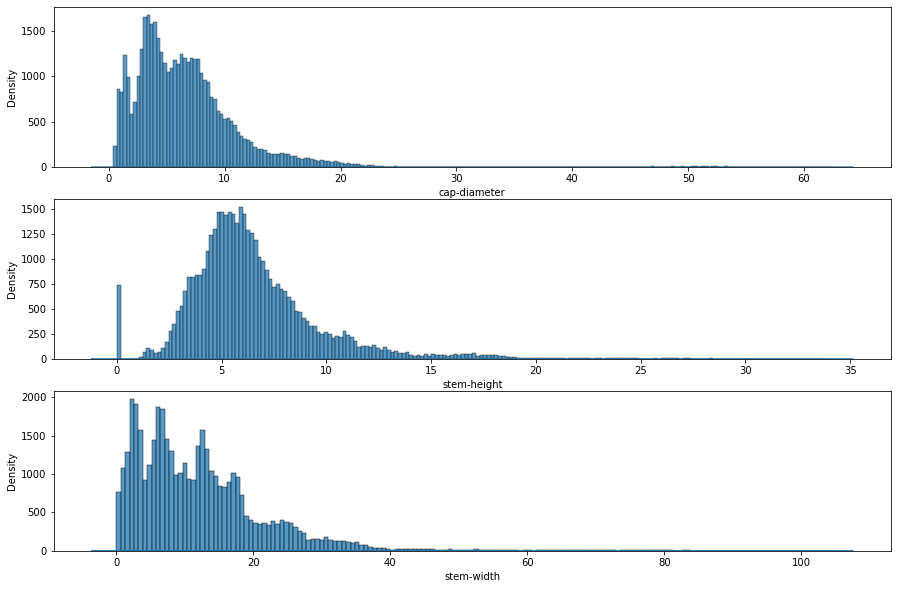

In [143]:
f, ax = plt.subplots(3, 1, figsize = (15 , 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.kdeplot(data = train, x = col, ax = axx[index])
    sns.histplot(data = train, x = col, ax = axx[index])

---
# Bi-Variate Analysis

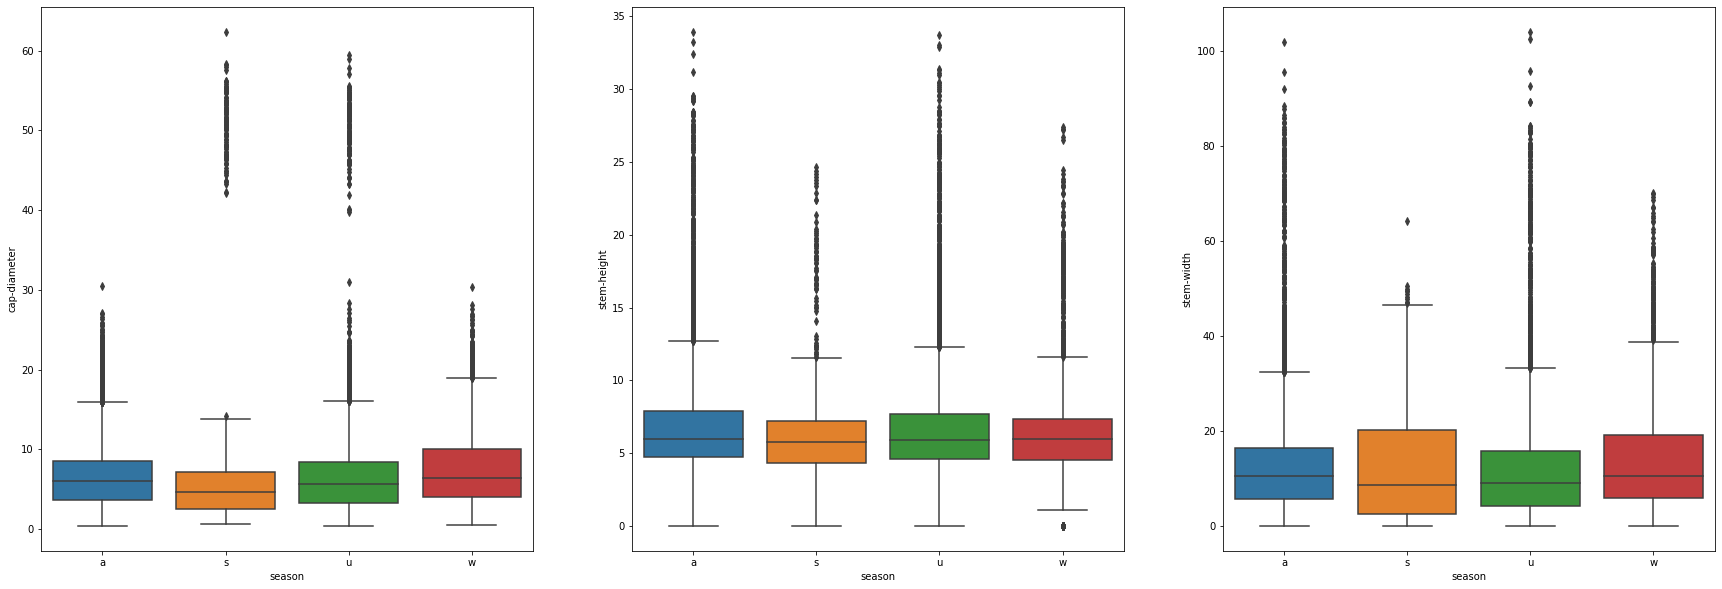

In [144]:
f, ax = plt.subplots(1, 3, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = target, y = col, ax = axx[index])

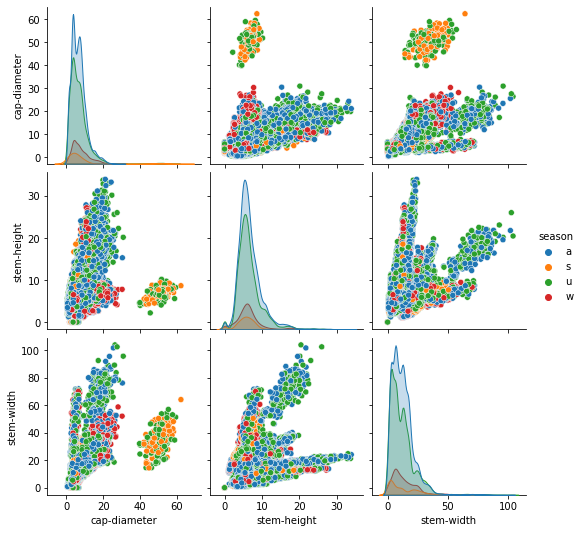

In [145]:
sns.pairplot(data = train, hue = target)

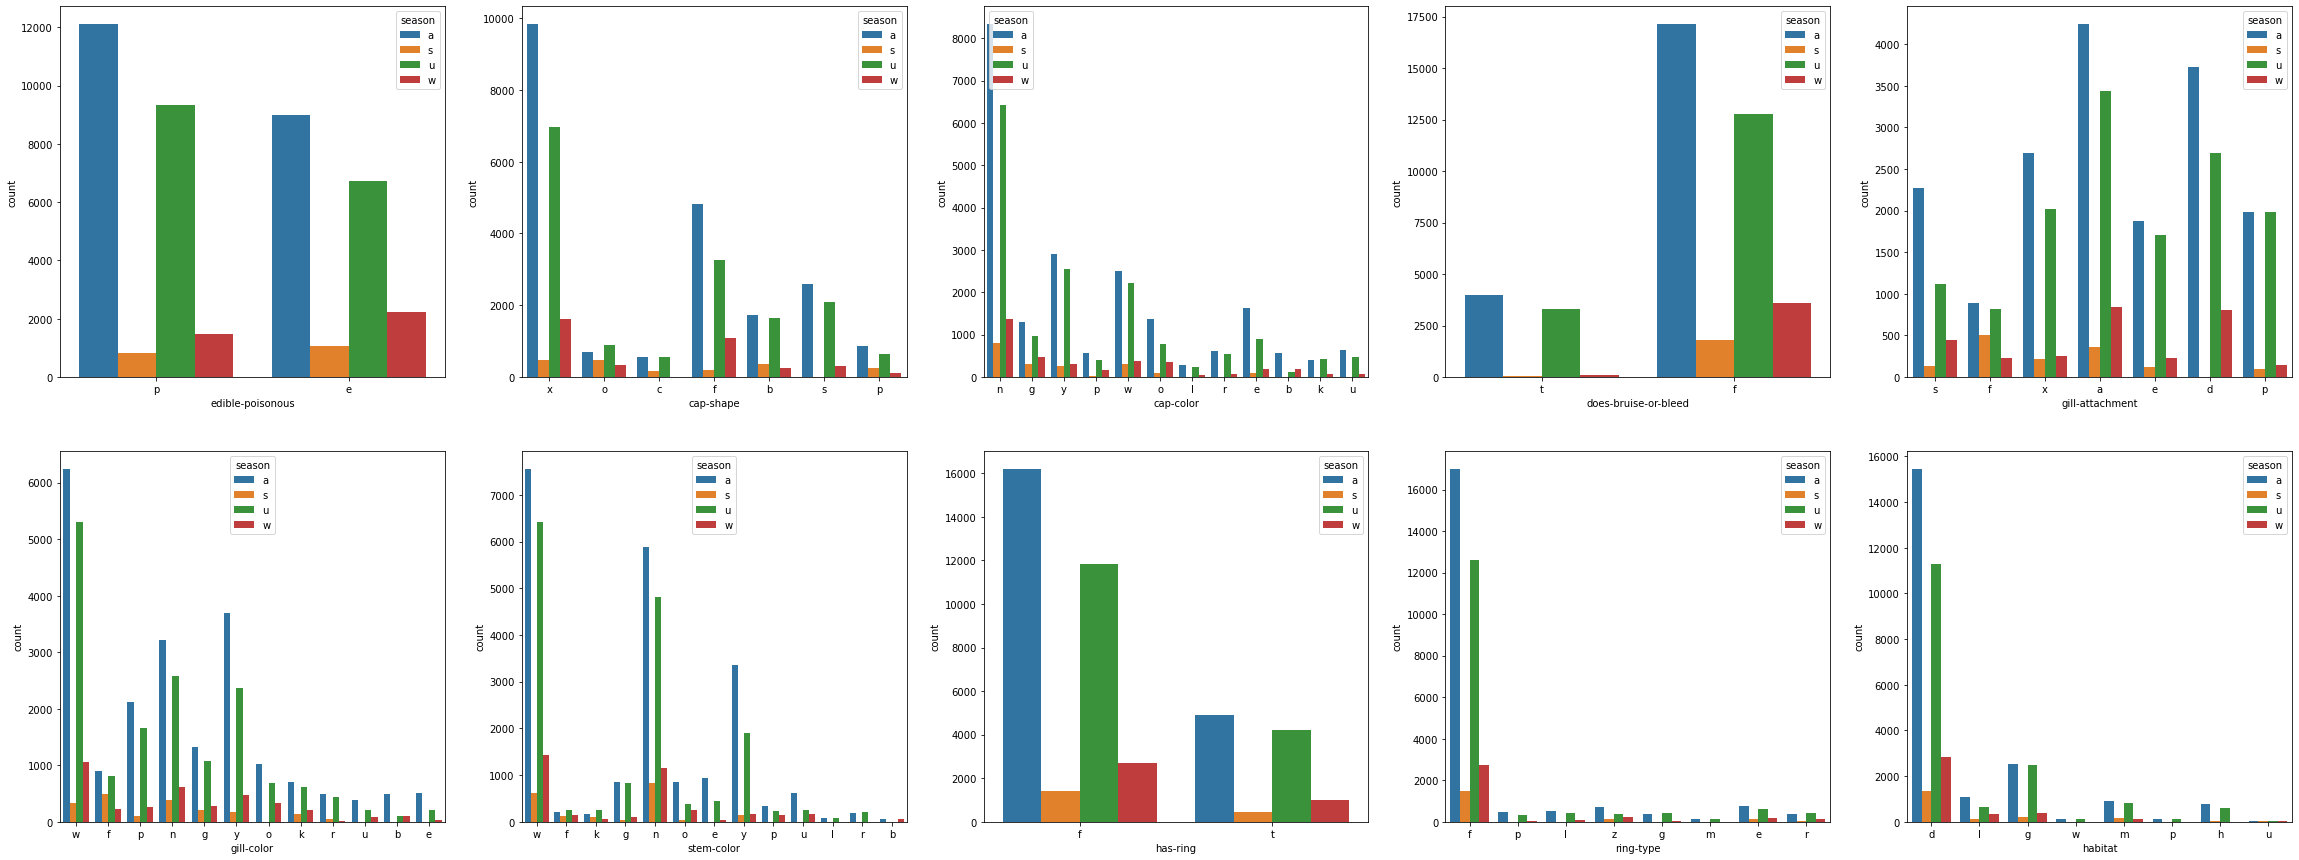

In [146]:
f, ax = plt.subplots(2, 5, figsize = (40 , 15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.countplot(data = train, x = col, hue = target, ax = axx[index])

---
# Multi-Varuate Analysis

In [147]:
train.head(2)

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s


---
**1**

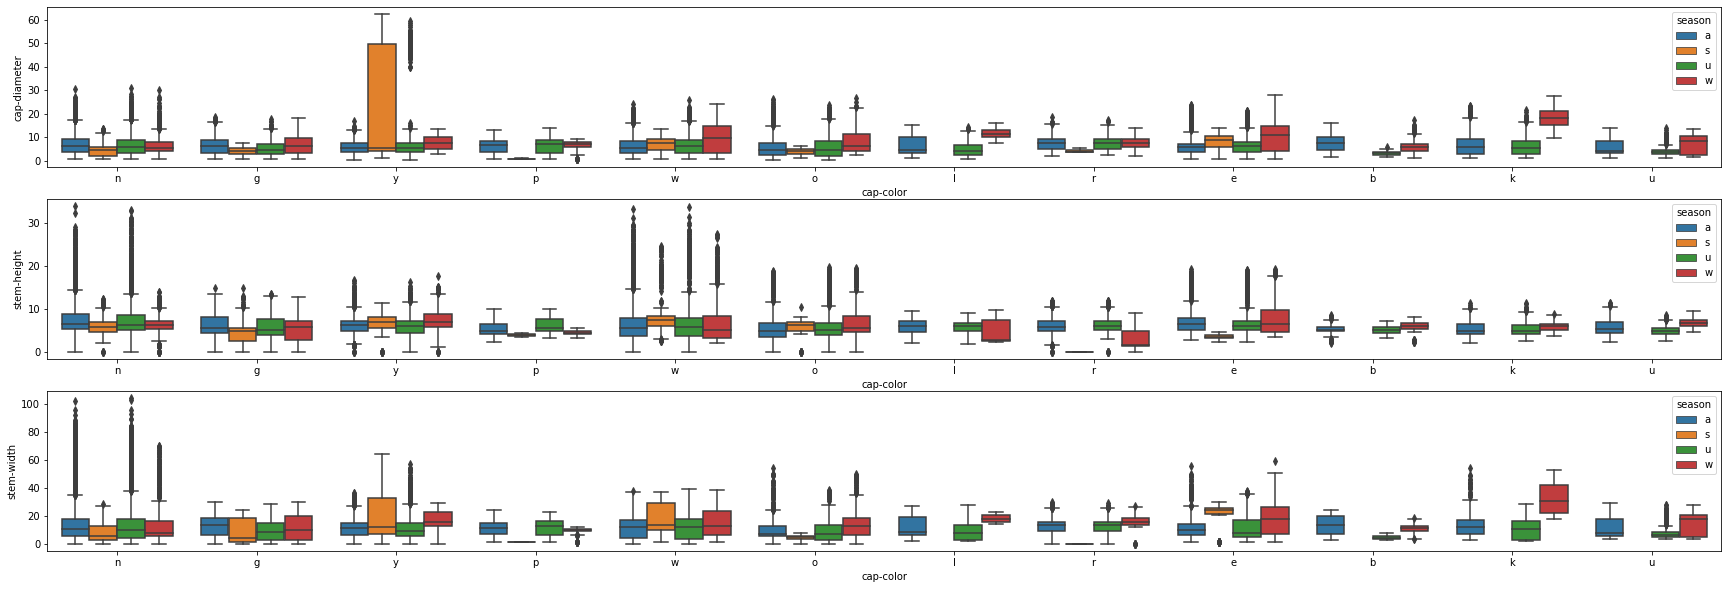

In [148]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'cap-color', y = col, hue = target, ax = axx[index])

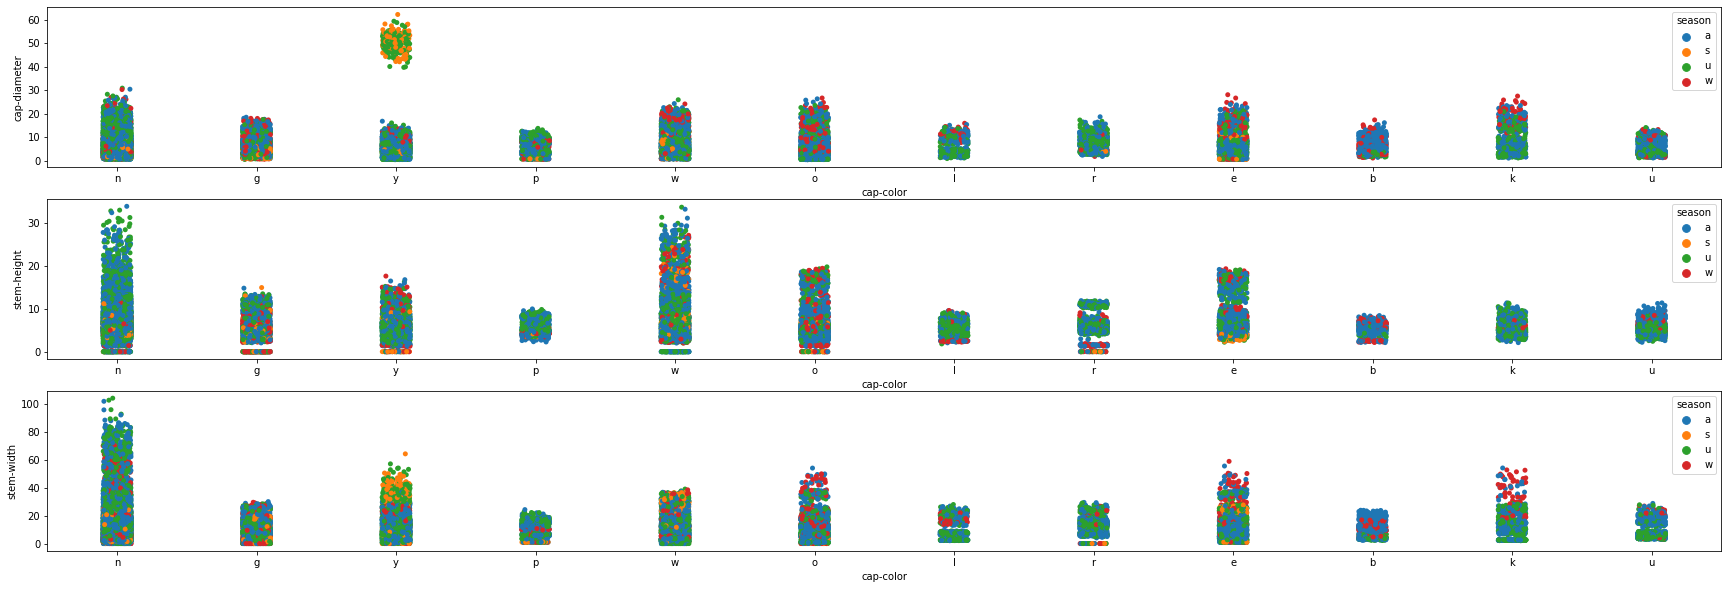

In [149]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'cap-color', y = col, ax = axx[index], hue = target)

---
**2**

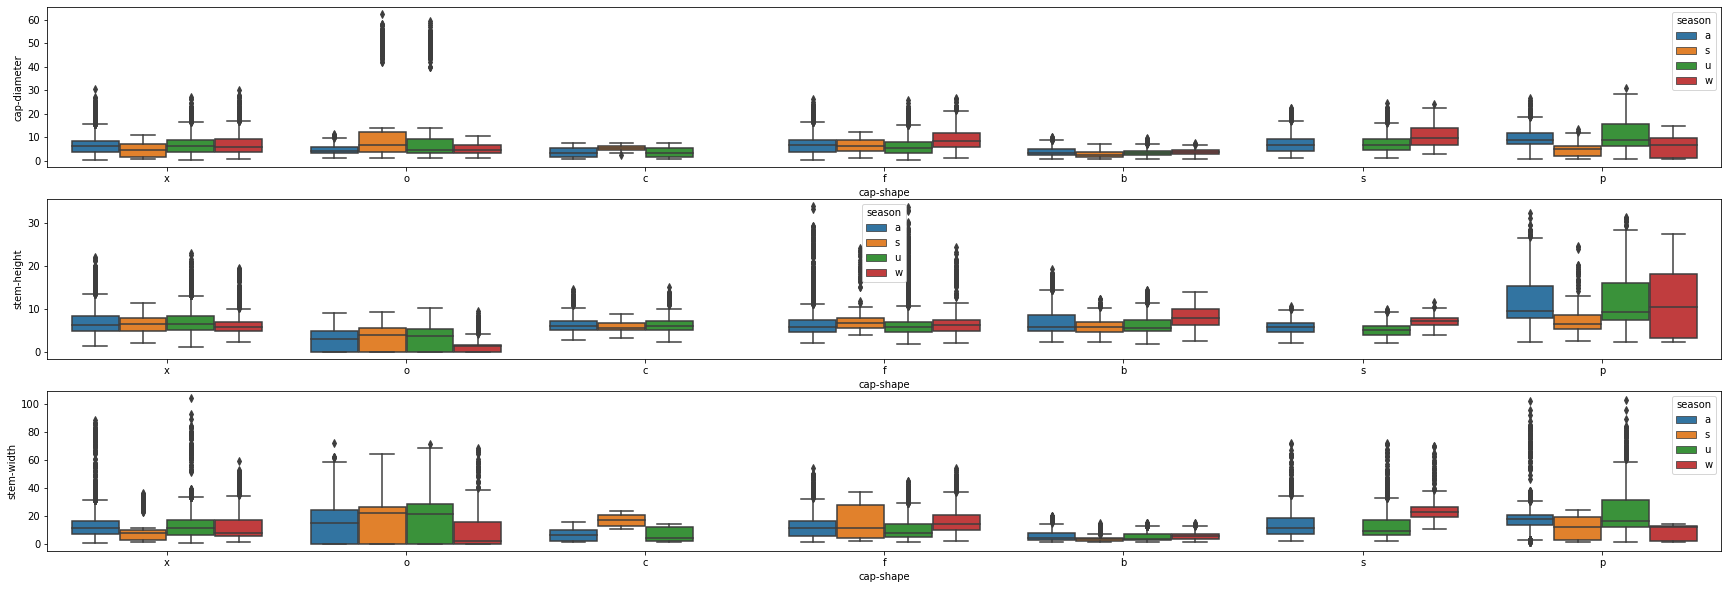

In [150]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'cap-shape', y = col, hue = target, ax = axx[index])

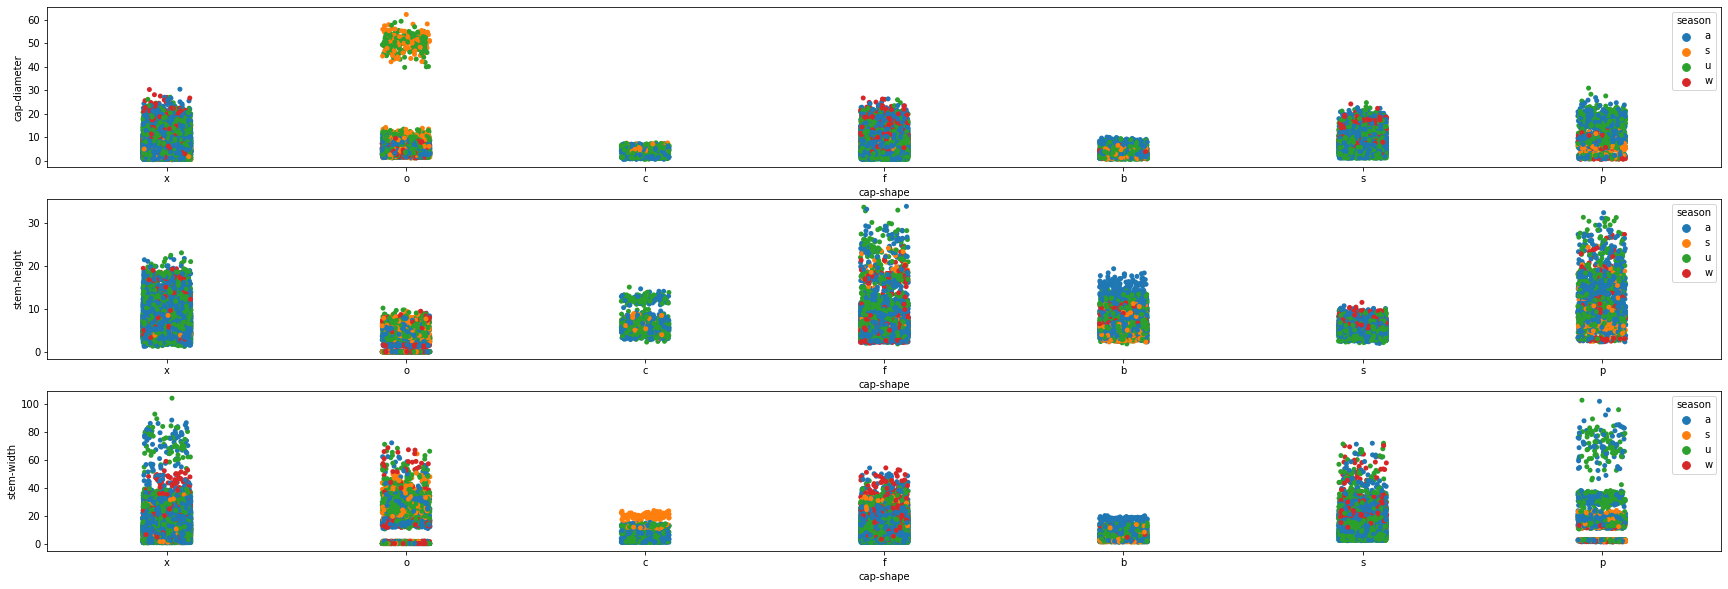

In [151]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'cap-shape', y = col, ax = axx[index], hue = target)

---
**3**

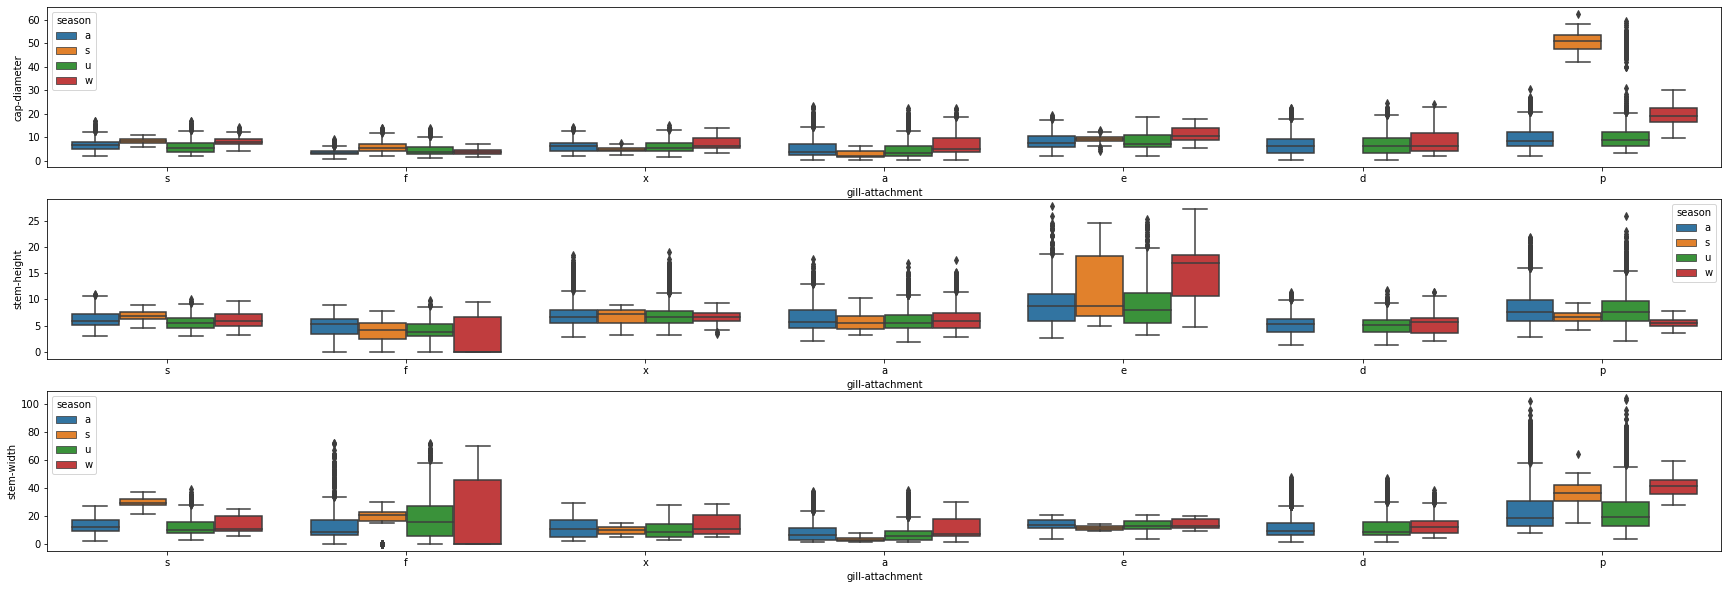

In [152]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'gill-attachment', y = col, hue = target, ax = axx[index])

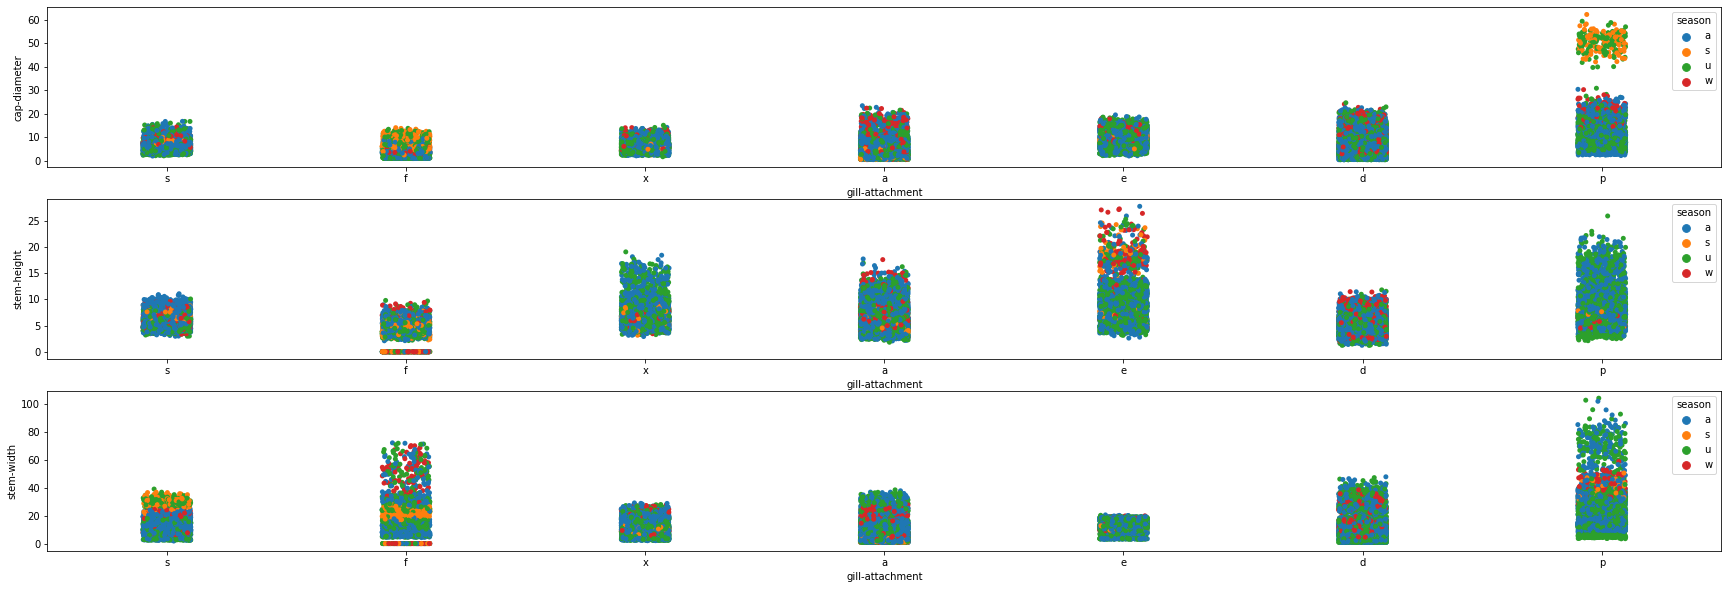

In [153]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'gill-attachment', y = col, ax = axx[index], hue = target)

---
**4**

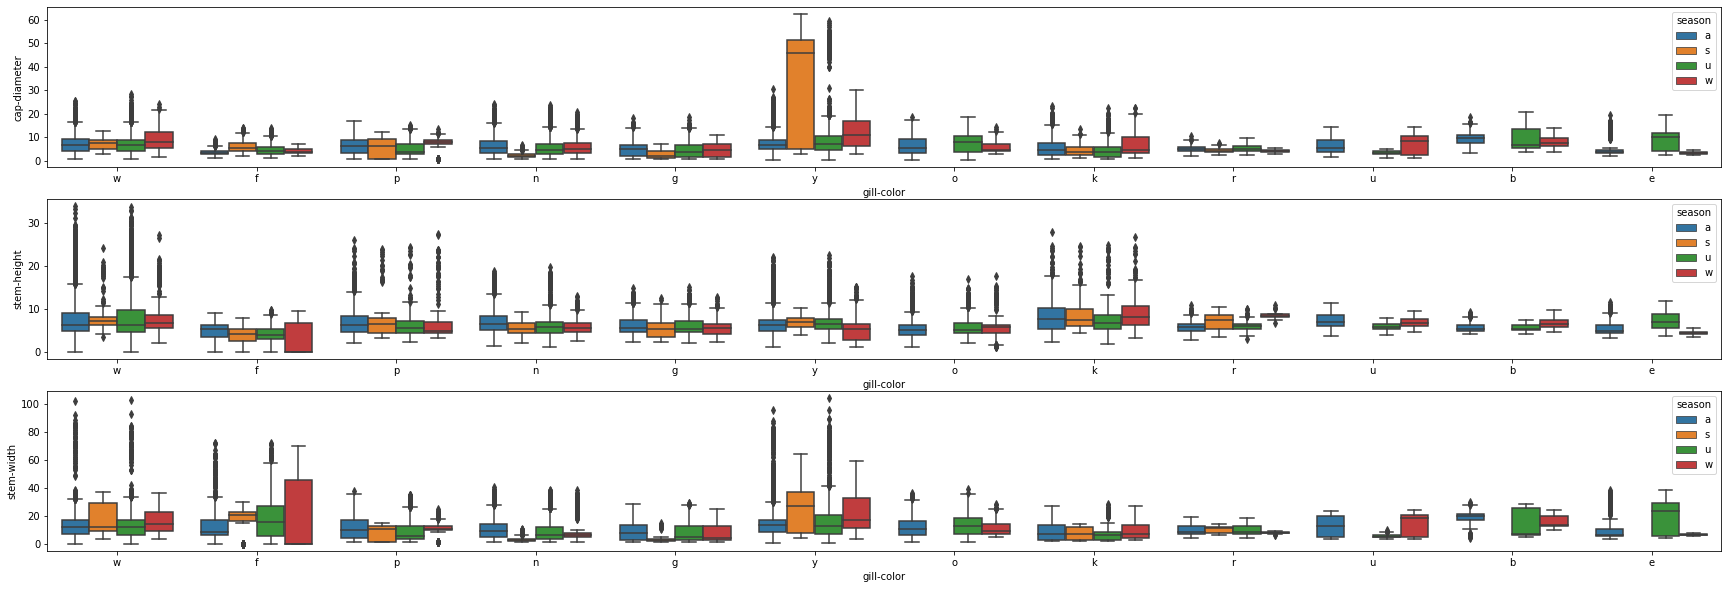

In [154]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'gill-color', y = col, hue = target, ax = axx[index])

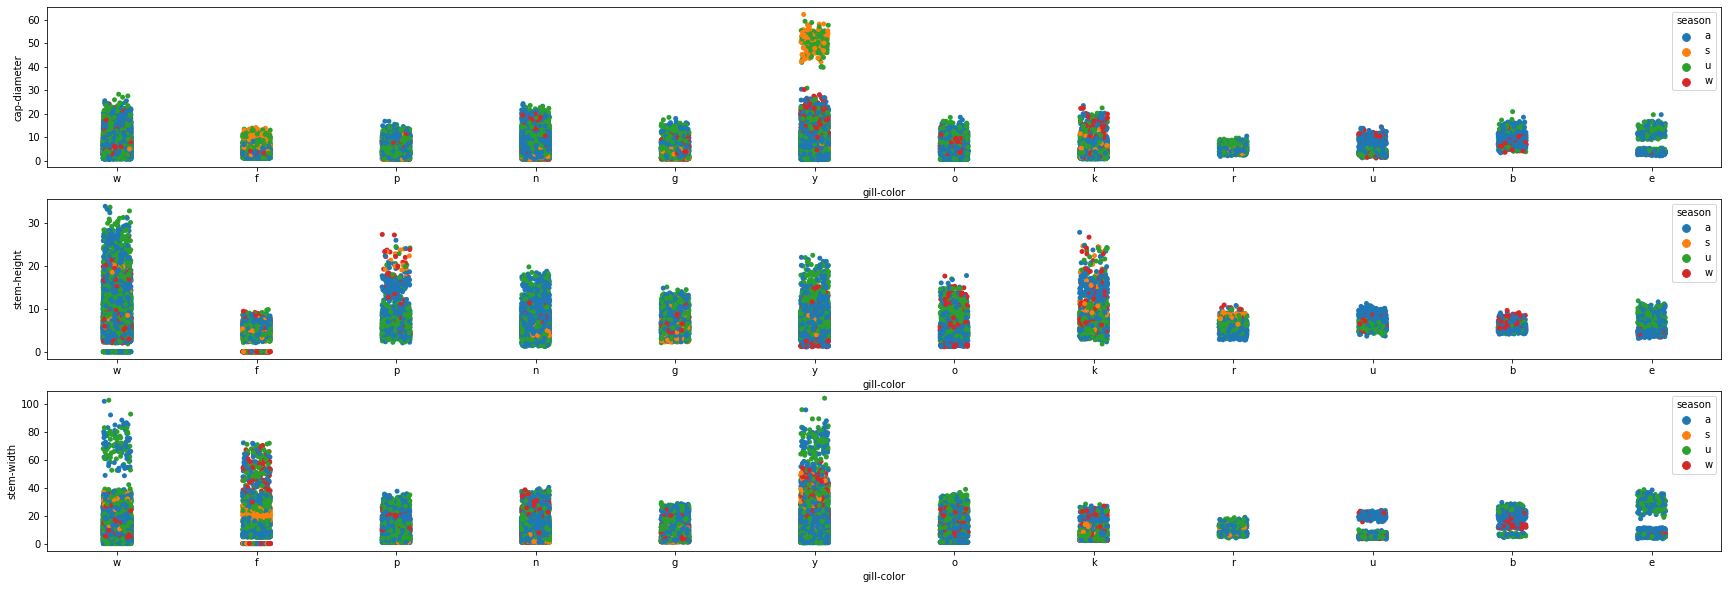

In [155]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'gill-color', y = col, ax = axx[index], hue = target)

---
**5**

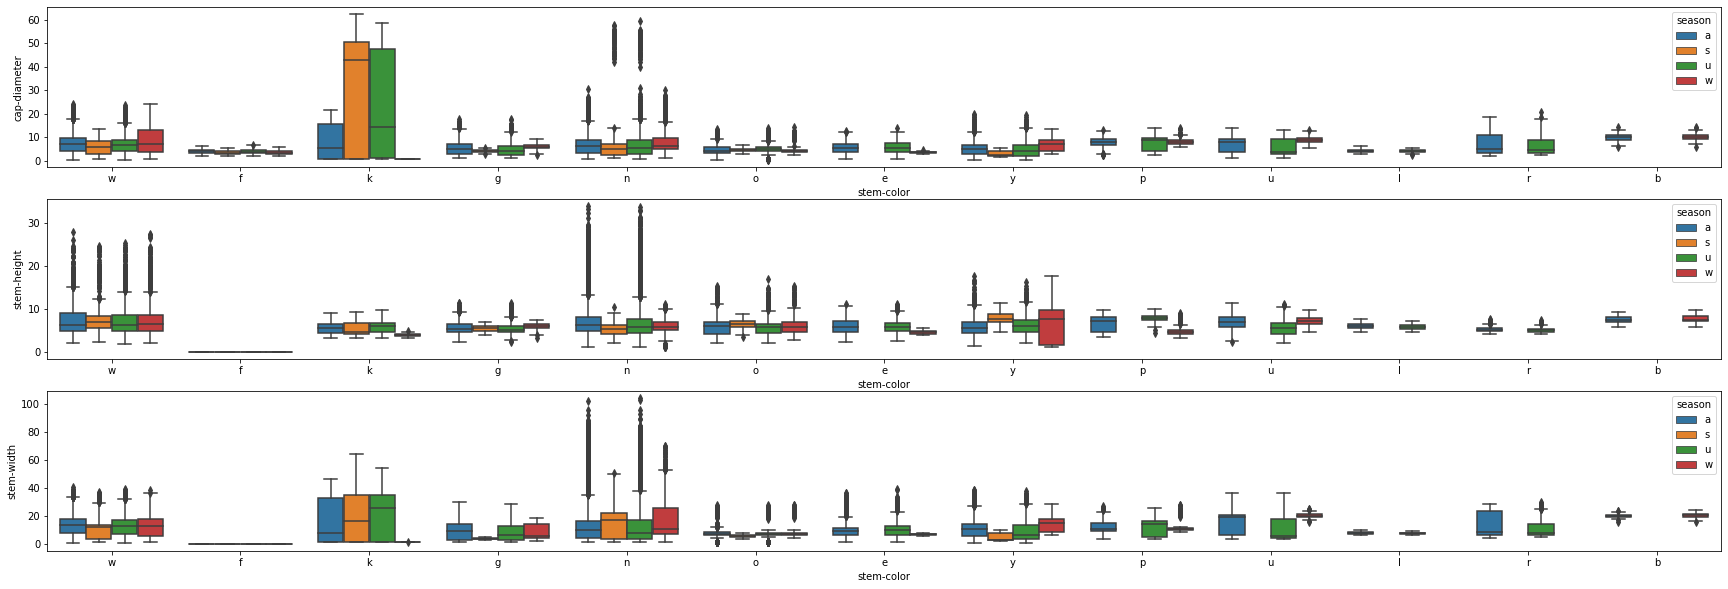

In [156]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'stem-color', y = col, hue = target, ax = axx[index])

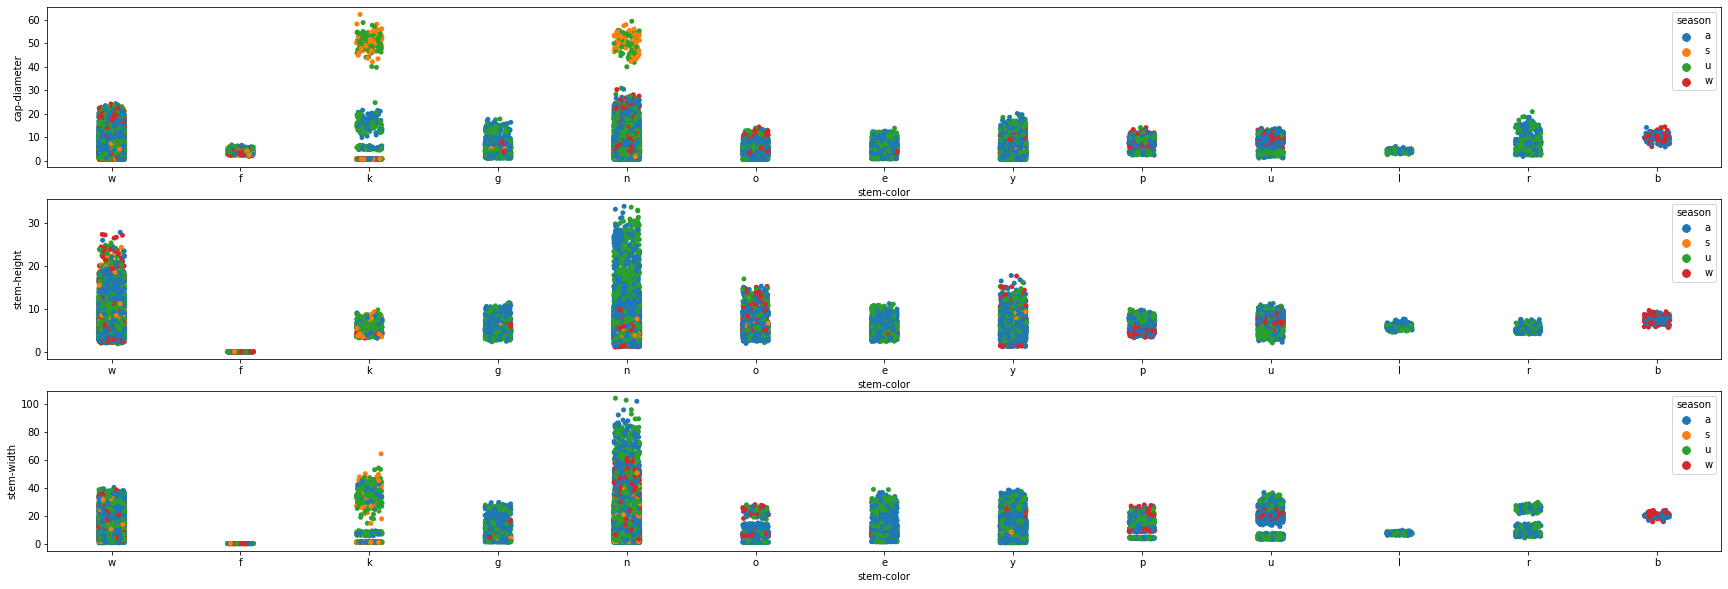

In [157]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'stem-color', y = col, ax = axx[index], hue = target)

---
**6**

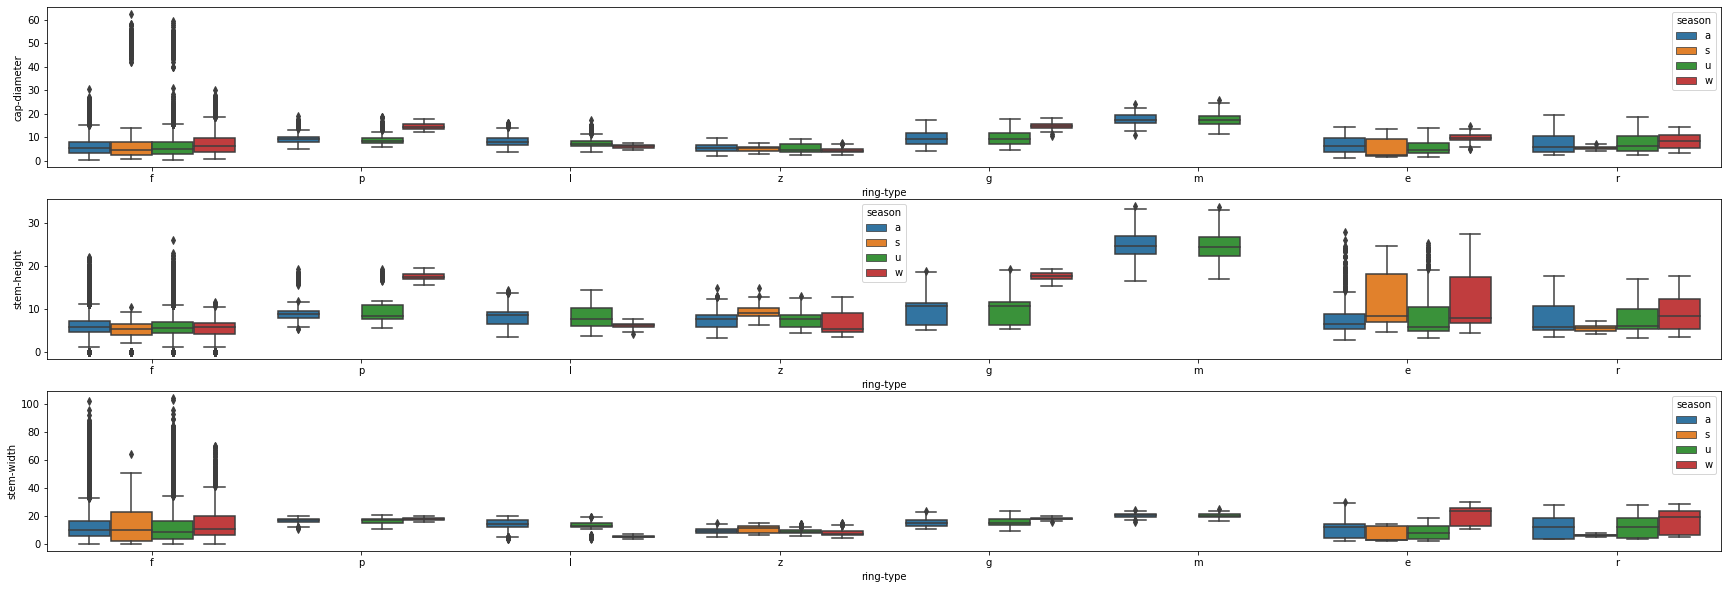

In [158]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'ring-type', y = col, hue = target, ax = axx[index])

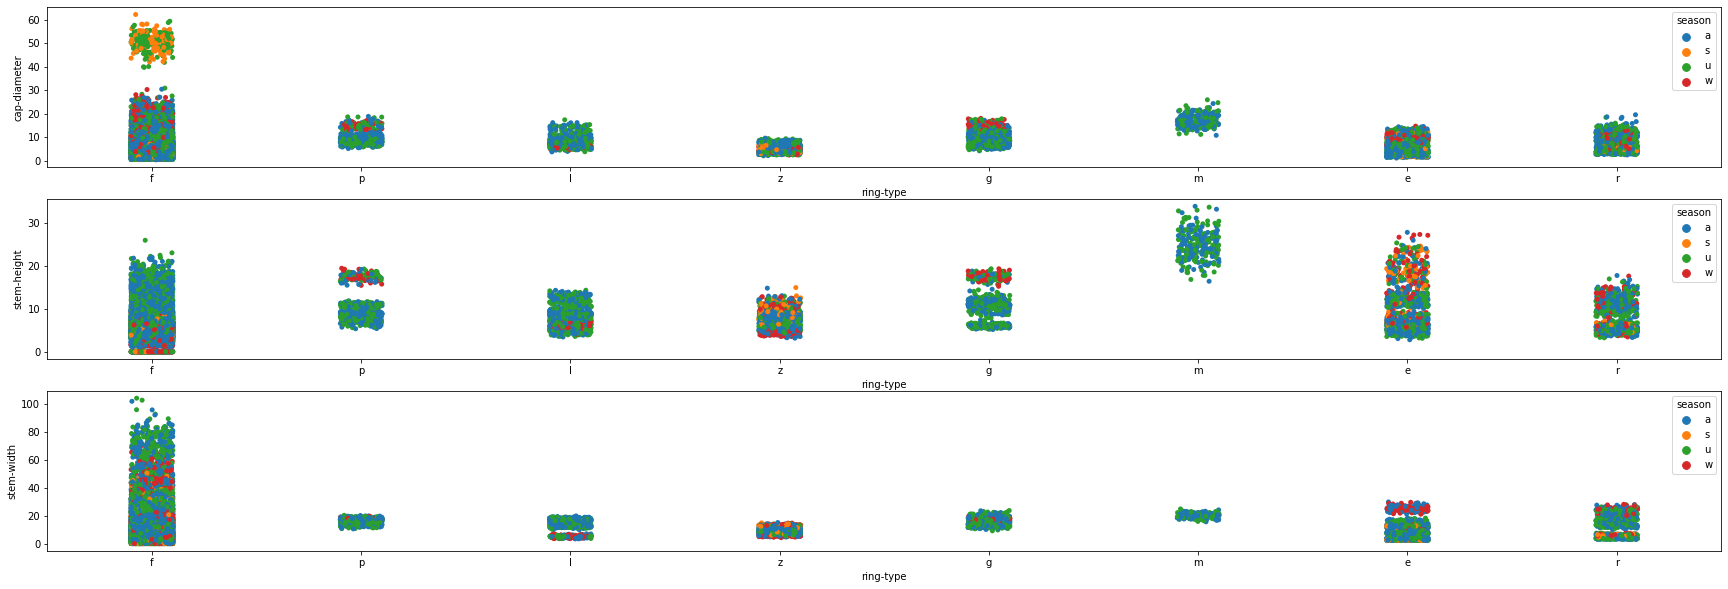

In [159]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'ring-type', y = col, ax = axx[index], hue = target)

---
**7**

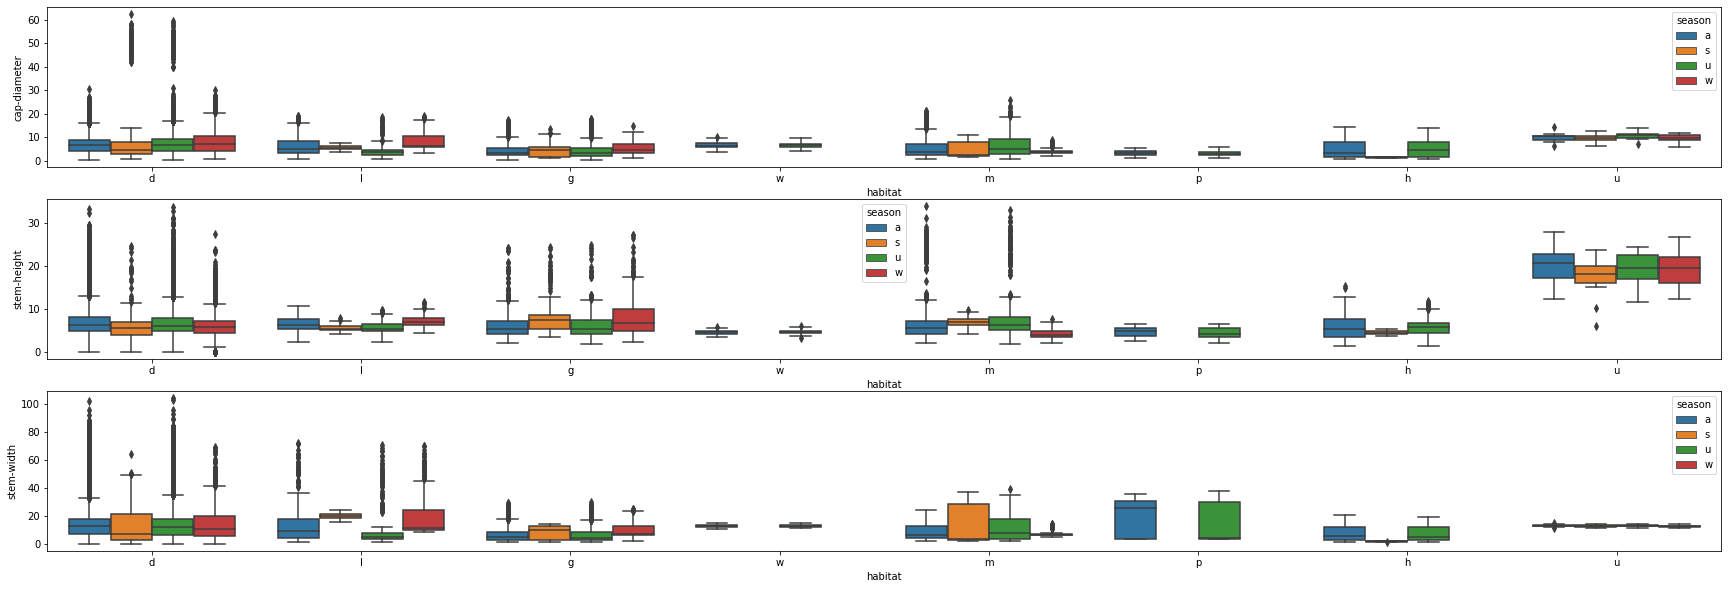

In [160]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.boxplot(data = train, x = 'habitat', y = col, hue = target, ax = axx[index])

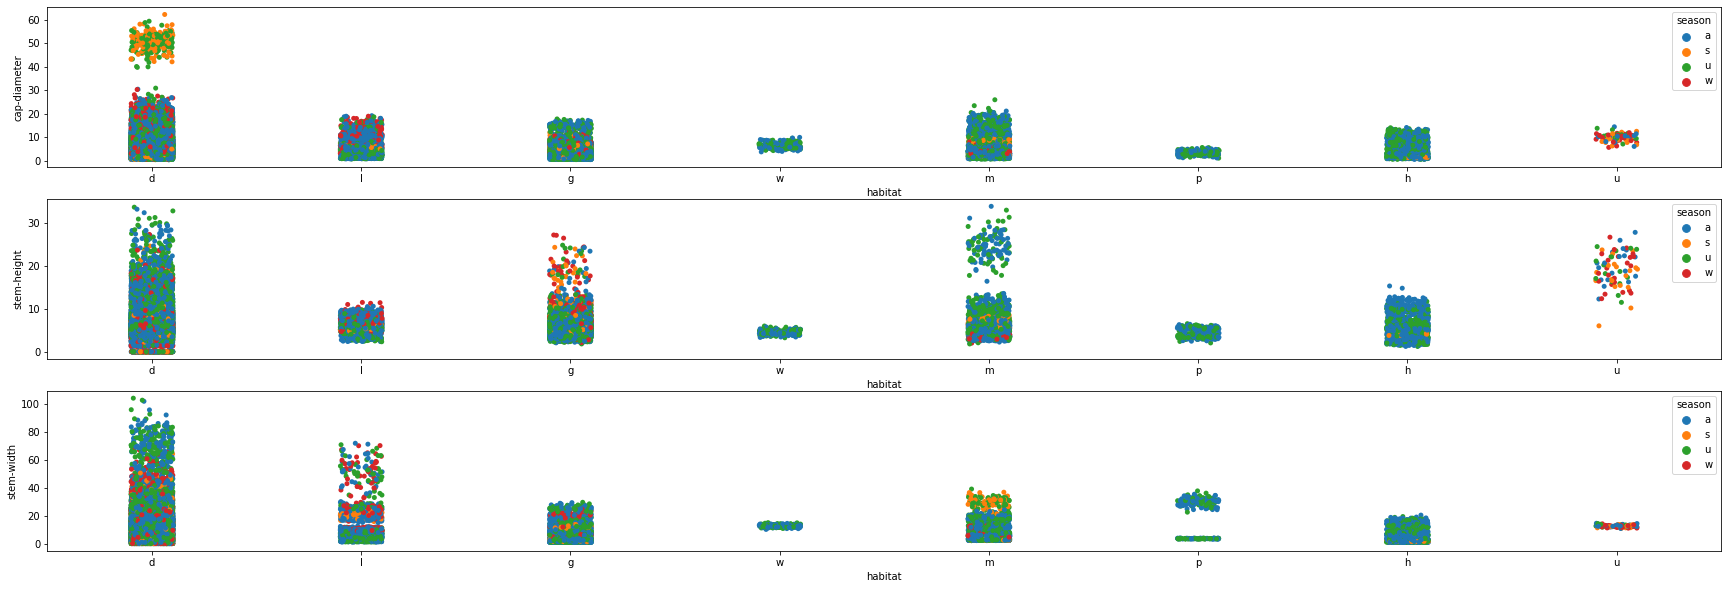

In [161]:
f, ax = plt.subplots(3, 1, figsize = (30, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(data = train, x = 'habitat', y = col, ax = axx[index], hue = target)

---
# Modelling

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, log_loss, confusion_matrix


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from tqdm import tqdm_notebook, tqdm

path = os.getcwd()
data_path = 'C:\\Users\\Hrishi\\Projects\\Data\\'

In [163]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_sub = pd.read_csv(data_path + 'sample_submission.csv')

target = 'season'

### Preprocessing

In [164]:
train.fillna('z', inplace=True)
test.fillna('z', inplace=True)
test['season'] = None

In [165]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [166]:
target_mapper = {'a' : 1, 'u' : 2, 'w' : 3, 's' : 4}
target_reverse_mapper = {1 : 'a', 2 : 'u', 3 : 'w', 4 : 's'}


**Feature Engineering**

In [167]:
# def join(train_, test_):
#     df_ = pd.concat([train_, test_], axis = 0).reset_index(drop=True)
#     return df_

# def split(df_):
#     cat_cols = ['edible-poisonous', 'does-bruise-or-bleed', 'has-ring', 'cap-shape', 'cap-color','gill-attachment','gill-color','stem-color','ring-type','habitat']
#     df_[cat_cols] = df_[cat_cols].apply(le.fit_transform)
    
#     train_, test_ = df_[: train.shape[0]], df_[train.shape[0]:].reset_index(drop=True)
    
#     train_[target].replace(target_mapper, inplace=True)
#     features_ = [col for col in train_.columns if col not in [target]]
#     return train_, test_, features_

In [168]:
# df = join(train, test)
# df['is_gill_attachment'] = df['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)
# df['is_greater_cap_d'] = df['cap-diameter'].apply(lambda x: 1 if x>36 else 0)
# df['height_width_filter'] = df.apply(lambda x: 1 if (x['stem-height'] > 12 and x['stem-width'] > 45) else 0, axis = 1)
# train_feat, test_feat, features_feat = split(df)

In [169]:
# df = join(train, test)

# df['grp'] = df.groupby(['habitat', 'gill-attachment'])['cap-diameter'].transform('mean')
# # df['grp'] = df.groupby(['habitat', 'ring-type'])[target].transform('mean')


# # train_feat, test_feat, features_feat = split(df)

In [170]:
# df = join(train, test)

# df['is_gill_attachment'] = df['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)
# df['is_greater_cap_d'] = df['cap-diameter'].apply(lambda x: 1 if x>36 else 0)
# df['height_width_filter'] = df.apply(lambda x: 1 if (x['stem-height'] > 12 and x['stem-width'] > 45) else 0, axis = 1)

# df["cap-diameter_bins"] = pd.cut(df["cap-diameter"], bins=7, labels=False)
# df["stem-height_bins"] = pd.cut(df["stem-height"], bins=7, labels=False)
# df["stem-width_bins"] = pd.cut(df["stem-width"], bins=7, labels=False)

# train_feat, test_feat, features_feat = split(df)

In [171]:
# df = join(train, test)

# df['is_gill_attachment'] = df['gill-attachment'].apply(lambda x: 0 if x == 'f' else 1)
# df['is_greater_cap_d'] = df['cap-diameter'].apply(lambda x: 1 if x>36 else 0)
# df['height_width_filter'] = df.apply(lambda x: 1 if (x['stem-height'] > 12 and x['stem-width'] > 45) else 0, axis = 1)

# df["cap-diameter_bins"] = pd.cut(df["cap-diameter"], bins=7, labels=False)
# df["stem-height_bins"] = pd.cut(df["stem-height"], bins=7, labels=False)
# df["stem-width_bins"] = pd.cut(df["stem-width"], bins=7, labels=False)

# df['cap_/_height'] = df.apply(lambda x: x['cap-diameter']/x['stem-height'] if x['stem-height'] > 0 else -1, axis = 1) #1
# # df['cap_/width'] = df.apply(lambda x: x['cap-diameter']/x['stem-width'] if x['stem-width'] > 0 else -1, axis = 1)
# # df['width_/height'] = df.apply(lambda x: x['stem-width']/x['stem-height'] if x['stem-height'] > 0 else -1, axis = 1)
# train_feat, test_feat, features_feat = split(df)

In [172]:
d = pd.crosstab(df['cap-diameter'], df['cap-shape']).apply(lambda r: r/r.sum(), axis=1).to_dict()
shape = list(df['cap-shape'].unique())

for i in shape:
    df[f'shape_dia_{i}'] = df['cap-diameter'].apply(lambda x: d[i][x])


d = pd.crosstab(df['stem-width'], df['cap-shape']).apply(lambda r: r/r.sum(), axis=1).to_dict()
shape = list(df['cap-shape'].unique())

for i in shape:
    df[f'shape_wid{i}'] = df['stem-width'].apply(lambda x: d[i][x])



d = pd.crosstab(df['cap-diameter'], df['stem-color']).apply(lambda r: r/r.sum(), axis=1).to_dict()
shape = list(df['stem-color'].unique())

for i in shape:
    df[f'stem_color_dia_{i}'] = df['cap-diameter'].apply(lambda x: d[i][x])

In [173]:
cat_cols = ['edible-poisonous', 'does-bruise-or-bleed', 'has-ring', 'cap-shape', 'cap-color','gill-attachment','gill-color','stem-color','ring-type','habitat']
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

cat_cols = ['cap-shape', 'cap-color','gill-color','stem-color','habitat', 'ring-type']
df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)


target_mapper = {'a' : 1, 'u' : 2, 'w' : 3, 's' : 4}
target_reverse_mapper = {1 : 'a', 2 : 'u', 3 : 'w', 4 : 's'}

train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
train_proc[target].replace(target_mapper, inplace=True)

features = [col for col in df.columns if col not in ([target])]


In [174]:
features = [col for col in df.columns if col not in ([target])]


trn, val = train_test_split(train_proc, test_size = 0.25, random_state = 1999, stratify=train_proc[target])

X_trn, X_val = trn[features], val[features]

y_trn, y_val = trn[target], val[target]

X_test = test_proc[features]

In [175]:
# params = params = {'reg_lambda': 5.321972207911041, 'reg_alpha': 4.183822338373603, 
# 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.05600318141423552, 
#             'n_estimators': 2534, 'num_leaves': 89, 'min_child_samples': 131, 
#                         'max_depth': 20, 'random_state': 2001, 'min_child_weight': 24}

model = LGBMClassifier(random_state=1999)

_ = model.fit(train_proc[features], train_proc[target])

preds = model.predict(test_proc[features])

In [176]:
## From post-modelling EDA
## Unique cap-diameters for each of the class. This can also be the reason of overfitting and I have experienced it. This won't give you the bast results but aim is to get as many correct as possible. 
a = [23.53, 19.1, 18.93, 15.22, 15.19, 0.47, 15.9, 16.52, 12.07, 10.51, 12.43, 19.08, 18.57, 14.02, 13.67, 17.05, 16.17, 15.86, 9.44, 26.02, 17.15, 10.66, 20.34, 12.9, 20.78, 23.74, 14.04, 13.1, 22.19, 8.88, 18.47, 14.13, 14.47, 13.28, 16.22, 14.65, 19.53, 19.32, 18.96, 28.95, 18.08, 19.9, 13.6, 16.8, 10.24, 23.62, 18.87, 16.28, 21.02, 14.46, 13.01, 15.06, 10.95, 15.27, 26.44, 19.22, 12.01, 24.06, 12.89, 21.24, 15.49, 23.82, 16.54, 17.68, 14.4, 13.68, 13.47, 11.06, 11.36, 14.12, 12.61, 19.49, 17.41, 23.39, 15.09, 16.02, 12.77, 21.96, 20.39, 22.15, 10.25, 20.51, 19.34, 18.43, 11.11, 17.36, 20.41, 16.06, 23.42, 14.74, 20.77, 17.18, 19.64, 16.37, 20.98, 17.38, 20.48, 17.98, 17.64, 16.58, 23.04, 15.39, 18.68, 13.52, 18.41, 11.91, 19.46, 18.95, 26.41, 22.63, 22.7, 14.32, 18.55, 16.18, 21.25, 16.41, 20.75, 15.79, 19.95, 20.43, 16.65, 23.38, 16.98, 12.17, 14.42, 18.52, 17.33, 17.46, 11.69, 18.65, 15.07, 20.11, 24.32, 13.73, 17.0, 15.13, 13.81, 21.91, 13.3, 18.77, 17.01, 17.2, 16.87, 16.69, 24.7, 23.34, 20.02, 22.24, 17.12, 14.16, 12.81, 21.75, 12.39, 13.8, 16.21, 0.5, 10.58, 20.52, 14.01, 21.1, 22.95, 23.71, 16.45, 18.11, 17.14, 14.87, 26.04, 25.98, 16.12, 19.63, 23.16, 17.3, 16.03, 18.0, 16.49, 17.39, 15.05, 19.79, 15.44, 19.59, 18.72, 12.46, 21.7, 14.09, 13.84, 19.48, 20.44, 15.91, 18.07, 21.72, 14.83, 24.77, 17.99, 17.37, 22.79, 18.27, 19.2, 22.69, 14.56, 12.93, 17.65, 17.55, 13.37, 19.85, 12.91, 21.2, 18.06, 18.53, 17.78, 21.05, 12.55, 11.57, 18.89, 19.56, 19.55, 20.94, 20.92, 16.77, 26.59, 15.92, 20.74, 25.6, 18.16, 16.46, 0.44, 16.05, 12.73, 22.26, 18.03, 21.56, 29.82, 16.32, 13.13, 17.35, 15.77]
u = [17.74, 22.04, 49.93, 16.27, 19.98, 16.59, 47.63, 16.19, 49.66, 24.48, 47.66, 12.59, 14.06, 18.26, 18.05, 18.74, 15.8, 49.98, 15.64, 13.4, 19.8, 17.62, 20.04, 49.55, 14.33, 50.7, 56.03, 20.17, 22.5, 15.73, 13.63, 22.2, 52.77, 20.09, 17.13, 47.12, 54.22, 56.48, 49.53, 48.19, 43.08, 20.93, 12.13, 18.19, 18.46, 17.19, 18.9, 11.45, 15.56, 14.49, 20.35, 20.53, 50.49, 16.36, 23.91, 15.98, 47.51, 12.84, 21.86, 47.56, 14.24, 14.3, 48.81, 16.63, 55.73, 14.91, 18.13, 15.51, 52.87, 20.05, 12.53, 21.08, 14.94, 14.38, 20.16, 19.02, 53.81, 17.25, 14.34, 12.65, 0.48, 14.84, 48.7, 19.72, 16.51, 15.83, 18.64, 44.16, 17.54, 17.57, 17.02, 17.61, 15.17, 16.38, 12.75, 47.68, 14.11, 50.99, 23.95, 23.67, 13.7, 22.56, 17.92, 14.52, 16.95, 49.11, 14.03, 53.66, 16.07, 19.45, 17.32, 14.62, 24.62, 55.94, 44.3, 17.34, 48.08, 50.06, 53.32, 20.95, 45.25, 19.16, 27.07, 23.51, 18.49, 10.99, 16.43, 17.97, 54.23, 19.83, 13.54, 21.94, 11.81, 19.92, 14.54, 14.45, 57.4, 46.26, 15.1, 54.81, 12.18, 11.86, 13.44, 20.88, 17.06, 19.04, 49.48, 12.99, 51.99, 20.8, 23.96, 53.3, 22.37, 0.51, 52.31, 21.16, 12.78, 19.41, 46.0, 11.53, 18.25, 49.31, 15.53, 45.89, 12.76, 27.83, 13.08, 38.79, 15.97, 12.92, 17.71, 51.08, 45.55, 44.98, 56.24, 25.12, 12.6, 47.88, 21.35, 20.07, 18.29, 15.3, 24.78, 18.91, 20.32, 21.53, 14.61, 43.42, 51.85, 16.44, 18.23, 17.11, 22.34, 15.87, 13.58, 51.9, 46.61, 49.16, 18.97, 17.48, 52.75, 22.54, 57.61, 14.5, 52.69, 18.48, 45.56, 47.72, 18.94, 12.11, 49.44, 19.15, 18.15, 13.89, 56.72, 22.31]
s = [47.13, 48.62, 47.82, 48.51, 48.45, 43.82, 54.27, 45.64, 46.45, 52.61, 48.63, 50.77, 51.3, 53.87, 53.52, 50.51, 55.16, 53.47, 48.71, 54.59, 49.25, 39.76, 52.73, 53.16, 42.27, 47.61, 50.18, 53.57, 52.94, 52.19, 45.67, 51.59, 51.58, 48.27, 51.36, 54.84, 45.53, 47.37, 58.11, 52.83, 49.59, 46.24, 53.4, 52.12, 53.37, 51.44, 46.44, 52.22]

In [177]:
test['season'] = preds

test.loc[ test['cap-diameter'].isin(a), 'season'] = 1
test.loc[ test['cap-diameter'].isin(u), 'season'] = 2
test.loc[ test['cap-diameter'].isin(s), 'season'] = 4

sample_sub[target] = test['season']
sample_sub[target].replace(target_reverse_mapper, inplace = True)
sample_sub.to_csv(data_path + 'best_performing_on_local.csv', index = False)

---
# Cross Validation

In [178]:
# def cross_val(features, train, test, clf, name):
#     N_splits = 5
    
#     ## Aggregating Predictions Prerequsities
# #     preds_df = pd.DataFrame()
#     ####
#     oofs = np.zeros(len(train))
#     preds = np.zeros((len(test), 4))
    
#     target_col = train[target]
    
#     folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state = 1999)
#     stratified_target = pd.qcut(target_col, 4, labels=False, duplicates='drop')
    
#     for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
#         print()
#         print(f'*************************Fold {index+1}*************************')
        
#         ## Training Set
#         X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
#         ## Validation Set
#         X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
#         ## Test Set
#         X_test = test[features]
        
        
#         ## Model Training
#         _ = clf.fit(X_trn, y_trn)
        
#         ## Predicting
#         val_preds = clf.predict(X_val)
#         test_preds = clf.predict_proba(X_test)
        
#         accuracy = accuracy_score(y_val, val_preds)
#         print()
#         print(f'Accuracy is: {accuracy}')
        
#         oofs[val_idx] = val_preds
#         preds += test_preds / N_splits
# #         if name == 'cat':
# #             a = pd.DataFrame(val_preds)
# #             b = a[0]
# #             oofs[val_idx] = b
            
# #             a = pd.DataFrame(test_preds)
# #             b = a[0]
# #             preds_df[str(index+1)] = b
# #         else:
# #             oofs[val_idx] = val_preds
# #             #preds += test_preds
# #             preds_df[str(index+1)] = test_preds
        
        
        
        
#     total_accuracy = accuracy_score(target_col, oofs)
#     print()
#     print(f'Accuracy is: {total_accuracy}')
    
#     ## Aggregating Predictions
# #     preds_df['Mode'] = preds_df.apply(lambda x: x.mode()[0], axis = 1)
# #     preds = preds_df['Mode']
#     p = []
#     for ls in preds:
#         out = list(ls).index(max(ls)) + 1
#         p.append(out)
#     return oofs, p

In [179]:
# lgb_oofs, lgb_vals = cross_val(features, train_proc, test_proc, lgb, 'lgb')